<a href="https://colab.research.google.com/github/yeongju98/YBIGTA/blob/main/CNN_%EA%B3%BC%EC%A0%9C_19%EA%B8%B0%EC%A7%80%EC%98%81%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YBIGTA CNN 과제 - LeNet 구현해보기

- 1, 2, 3 번에 있는 빈칸을 채워주시면 됩니다!
- 과제제출 폴더에

In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from torch.utils.data import DataLoader

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
root = './data'
if not os.path.exists(root):
  os.mkdir(root)
transform = transforms.Compose([transforms.ToTensor()])
train_data = dset.FashionMNIST(root=root, train=True, transform=transform, download=True)
test_data = dset.FashionMNIST(root=root, train=False, transform=transform, download=True)


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
batch_size = 100
num_epochs = 5
learning_rate = 0.01

In [4]:
train_loader = DataLoader (
    dataset = train_data,
    batch_size = batch_size,
    shuffle = True
)
test_loader = DataLoader (
    dataset = test_data,
    batch_size = batch_size,
    shuffle = False

)

# LeNet 구현하기!


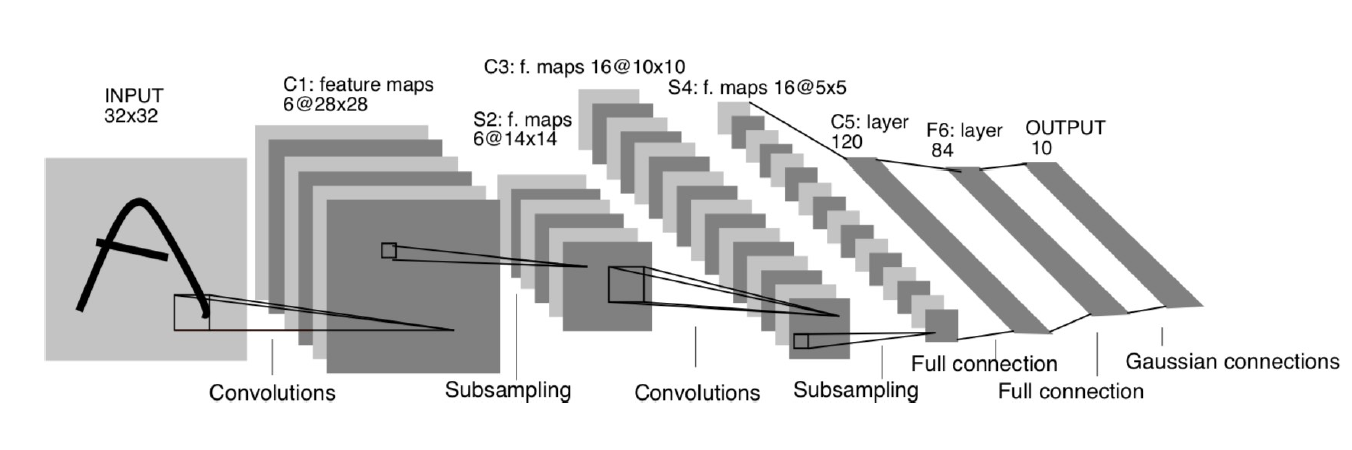

In [10]:
class LeNet_5(nn.Module):
    def __init__(self):
        super(LeNet_5,self).__init__()
        self.cnn = nn.Sequential(
            # 1. LeNet Convolution Layers 구성하기 (Layer 3의 Map Selection 부분은 구현할 필요 없음!)
            # 1st Layer: Filter size: 5, Stride 1, Padding 2, 6 Filters / Activation Function: Tanh / Average Pooling: Size 2
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2 ), 
            nn.Tanh(),
            nn.AvgPool2d(2),

            # 2nd Layer: Filter size: 5, Stride 1, 16 Filters / Activation Function: Tanh / Average Pooling: Size 2
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1), 
            nn.Tanh(), 
            nn.AvgPool2d(2),

            # 3rd Layer: Filter size: 5, Stride 1, 120 Filters / Activation Function: Tanh
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1), 
            nn.Tanh())
        
        self.linear = nn.Sequential(
            # 2. Fully Connected Layers 구성하기
            # 1st Layer: 120 -> 84 / Activation Function: Tanh
            nn.Linear(120, 84),
            nn.Tanh(),
            # 2nd Layer: 84 -> 10
            nn.Linear(84, 10)
        )
### in_channels, out_channels 구하는법!

    def forward(self, x):
        x = self.cnn(x)
        x = x.view(-1, 120)
        x = self.linear(x)
        return x

In [11]:
def weights_init(m):
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        nn.init.xavier_normal_(m.weight)

In [12]:
torch.manual_seed(23)
lenet = LeNet_5().to(device)
lenet.apply(weights_init)

LeNet_5(
  (cnn): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): Tanh()
  )
  (linear): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): Tanh()
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [13]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(lenet.parameters(), lr=learning_rate)

In [14]:
for epoch in range(num_epochs):
    for i, (imgs, labels) in enumerate(train_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = lenet.forward(imgs)
        loss = criterion(outputs, labels)
        
        # 3. Gradient Update
         # optimizer gradient 초기화
        optimizer.zero_grad()  
        # loss backpropagation
        loss.backward(),
        # optimizer step
        optimizer.step() 
        _, argmax = torch.max(outputs, 1)
        accuracy = (labels == argmax).float().mean()
        
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'.format(
                epoch+1, num_epochs, i+1, len(train_loader), loss.item(), accuracy.item() * 100))

Epoch [1/5], Step [100/600], Loss: 1.8199, Accuracy: 50.00%
Epoch [1/5], Step [200/600], Loss: 1.2239, Accuracy: 55.00%
Epoch [1/5], Step [300/600], Loss: 1.0277, Accuracy: 64.00%
Epoch [1/5], Step [400/600], Loss: 0.9340, Accuracy: 71.00%
Epoch [1/5], Step [500/600], Loss: 0.7445, Accuracy: 73.00%
Epoch [1/5], Step [600/600], Loss: 0.7112, Accuracy: 79.00%
Epoch [2/5], Step [100/600], Loss: 0.7313, Accuracy: 73.00%
Epoch [2/5], Step [200/600], Loss: 0.6991, Accuracy: 76.00%
Epoch [2/5], Step [300/600], Loss: 0.6991, Accuracy: 75.00%
Epoch [2/5], Step [400/600], Loss: 0.7506, Accuracy: 73.00%
Epoch [2/5], Step [500/600], Loss: 0.7678, Accuracy: 71.00%
Epoch [2/5], Step [600/600], Loss: 0.5539, Accuracy: 85.00%
Epoch [3/5], Step [100/600], Loss: 0.6600, Accuracy: 73.00%
Epoch [3/5], Step [200/600], Loss: 0.6589, Accuracy: 82.00%
Epoch [3/5], Step [300/600], Loss: 0.6848, Accuracy: 74.00%
Epoch [3/5], Step [400/600], Loss: 0.5102, Accuracy: 81.00%
Epoch [3/5], Step [500/600], Loss: 0.783

In [15]:
lenet.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i, (imgs, labels) in enumerate(test_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = lenet(imgs)
        _, argmax = torch.max(outputs, 1)
        total += imgs.size(0)
        correct += (labels == argmax).sum().item()
    
    print('Test accuracy for LeNet-5: {:.2f}%'.format(correct / total * 100))

Test accuracy for LeNet-5: 79.76%
